In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'https://erddap.marine.ie/erddap/tabledap/IrishNationalTideGaugeNetwork.csvp?time%2Cstation_id%2CWater_Level_OD_Malin'

In [3]:
tide = pd.read_csv(file)

In [4]:
tide

,time (UTC),station_id,Water_Level_OD_Malin (metres)
0,2006-10-26T13:00:00Z,Skerries Harbour,1.820
1,2006-10-26T14:00:00Z,Skerries Harbour,2.080
2,2006-10-26T14:06:00Z,Skerries Harbour,2.110
3,2006-10-26T14:12:00Z,Skerries Harbour,2.000
4,2006-10-26T14:18:00Z,Skerries Harbour,1.950
...,...,...,...
16812619,2023-03-20T11:55:00Z,Roonagh Pier,-0.989
16812620,2023-03-20T11:55:00Z,Dingle Harbour,-0.729
16812621,2023-03-20T11:55:00Z,Rosslare,-2.098
16812622,2023-03-20T11:55:00Z,Dunmore East Harbour,-1.533


In [5]:
# plot the data
import matplotlib.pyplot as plt

In [6]:
# remove the outliers outside 3 standard deviations
tidyTide = tide[np.abs(tide['Water_Level_OD_Malin (metres)']-tide['Water_Level_OD_Malin (metres)'].mean())<=(3*tide['Water_Level_OD_Malin (metres)'].std())]

<AxesSubplot: >

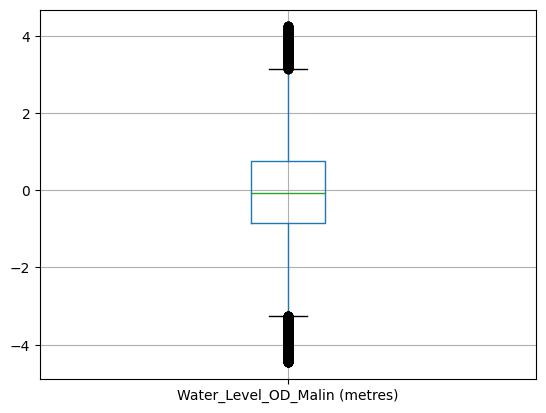

In [7]:
tidyTide.boxplot(column= 'Water_Level_OD_Malin (metres)')

In [8]:
tidyTide['Water_Level_OD_Malin (metres)'].max()

4.246

In [9]:
tidyTide['Water_Level_OD_Malin (metres)'].min()

-4.461

In [10]:
# data has removed outliers
# get the HAT - Highest Astronomical Tide

HAT = tidyTide.groupby('station_id').max('Water_Level_OD_Malin (metres)')

In [11]:
#new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
HATfinal = pd.merge(tidyTide, HAT, how='right', on=['Water_Level_OD_Malin (metres)', 'station_id'] )

In [139]:
HATdf = HATfinal[['station_id', 'Water_Level_OD_Malin (metres)']]

In [13]:
#  find Mean Tide Level
from scipy.signal import find_peaks

In [14]:
listTGN = tidyTide['station_id'].unique().tolist()

In [15]:
listTGNclean = []


# remove all characters after a space, for naming conventions
for i in listTGN:
    head, sep, tail = i.partition(" ")
    listTGNclean.append(head)

In [16]:
def lowTide(df, column):
    peaksIndex = find_peaks(-(df[column]))
    peaksValues = peaksIndex[0]
    peaksDF = df.take(peaksValues)
    return peaksDF


In [17]:
lowTide(tidyTide, 'Water_Level_OD_Malin (metres)')

,time (UTC),station_id,Water_Level_OD_Malin (metres)
52,2006-10-26T19:06:00Z,Skerries Harbour,-1.450
55,2006-10-26T19:24:00Z,Skerries Harbour,-1.460
110,2006-10-27T00:54:00Z,Skerries Harbour,1.560
114,2006-10-27T01:18:00Z,Skerries Harbour,1.660
122,2006-10-27T02:06:00Z,Skerries Harbour,1.650
...,...,...,...
16812609,2023-03-20T11:55:00Z,Kilrush Lough,-1.595
16812612,2023-03-20T11:55:00Z,Castletownbere Port,-4.307
16812615,2023-03-20T11:55:00Z,Ballyglass Harbour,-1.400
16812617,2023-03-20T11:55:00Z,Sligo,-1.566


In [141]:
MTLdf = pd.DataFrame(columns= ['station_id', 'MTLLow', 'MTLHigh'])

for i in listTGN:
    df = tidyTide[tidyTide['station_id']==i]
    # finds trough, but need to get the average- to return one value
    # this returns the index of the troughs/peaks
    # need to extract the values from the index and find the average after that. 
    troughsTuple = find_peaks(-(df['Water_Level_OD_Malin (metres)'])) # this will return the index in the first entry of the tuple
    troughslist =troughsTuple[0]
    troughsdf = df.take(troughslist) # creates a dataframe of the troughs
    troughs = troughsdf.loc[:, 'Water_Level_OD_Malin (metres)'].mean()

        # finds peaks but need to get the average- to return one value
    peaksTuple = find_peaks(df['Water_Level_OD_Malin (metres)'])
    peakslist =peaksTuple[0]
    peaksdf = df.take(peakslist) # creates a dataframe of the troughs
    peaks = peaksdf.loc[:, 'Water_Level_OD_Malin (metres)'].mean()
    MTLdf.loc[len(MTLdf)]= [i, troughs, peaks]


In [142]:
MTLdf

,station_id,MTLLow,MTLHigh
0,Skerries Harbour,-0.114063,0.497799
1,Castletownbere Port,-0.405925,0.033635
2,Galway Port,-0.236818,0.871013
3,Dublin Port,-0.557799,0.205144
4,Killybegs Port,-0.012280,0.528623
5,Inishmore,-0.132735,0.238574
6,Wexford Harbour,-0.214620,0.107647
7,Malin Head - Portmore Pier,0.074356,0.274858
8,Ballyglass Harbour,-0.052315,0.332954
9,Aranmore Island - Leabgarrow,0.041856,0.216732


# Find the spring Tides


In [51]:
list = []
for x in range(2006, 2024):
    list.append(x)


In [52]:
print(list)

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [73]:
# get the full and new moon data
import requests
import pandas as pd

moondf = pd.DataFrame(columns= ['Lunation','New Moon', 'New Moon.1', 'First Quarter', 'First Quarter.1', 'Full Moon', 'Full Moon.1', 'Third Quarter', 'Third Quarter.1', 'Duration'])

for time in list:
    url = 'https://www.timeanddate.com/moon/phases/@2963597?year=%s'%(time)
    html = requests.get(url).content
    df_list = pd.read_html(html)# returns one data frame for each table in the webpage
    df_list[-2]['Year']= time
    #print(df_list[-2]) # returns the second last dataframe
    moondf = pd.concat([moondf, df_list[-2]])
    index_names = moondf[moondf['Lunation'] == '* All times are local time for Ireland. Time is adjusted for DST when applicable. They take into account refraction. Dates are based on the Gregorian calendar. Current lunation cycle is highlighted yellow. Special events are highlighted blue. Hover over events for more details.'].index
    moondf.drop(index_names, inplace = True)
    moondf['Year'] = moondf['Year'].astype('Int64') 
#moondf.loc[len(moondf)]= [time, month, date ]
#print(df)
#df.to_csv('my data.csv')

In [74]:
moondf

,Lunation,New Moon,New Moon.1,First Quarter,First Quarter.1,Full Moon,Full Moon.1,Third Quarter,Third Quarter.1,Duration,Year
0,1027,NaN,NaN,6 Jan,18:56,14 Jan,09:48,22 Jan,15:13,29d 11h 03m,2006
1,1028,29 Jan,14:14,5 Feb,06:28,13 Feb,04:44,21 Feb,07:16,29d 10h 16m,2006
2,1029,28 Feb,00:30,6 Mar,20:15,14 Mar,23:35,22 Mar,19:10,29d 9h 44m,2006
3,1030,29 Mar,11:15,5 Apr,13:00,13 Apr,17:40,21 Apr,04:28,29d 9h 29m,2006
4,1031,27 Apr,20:43,5 May,06:13,13 May,07:51,20 May,10:20,29d 9h 42m,2006
...,...,...,...,...,...,...,...,...,...,...,...
8,1245,16 Aug,10:38,24 Aug,10:57,31 Aug,02:35,6 Sep,23:21,29d 16h 02m,2023
9,1246,15 Sep,02:39,22 Sep,20:31,29 Sep,10:57,6 Oct,14:47,29d 16h 15m,2023
10,1247,14 Oct,18:55,22 Oct,04:29,28 Oct,21:24,5 Nov,08:36,29d 15h 32m,2023
11,1248,13 Nov,09:27,20 Nov,10:49,27 Nov,09:16,5 Dec,05:49,29d 14h 05m,2023


In [85]:
# new moon df and remove na, Full mon df and remove nas, then merge on lunation
newMoondf = moondf[['Lunation', 'New Moon', 'Year']].dropna()
fullMoondf = moondf[['Lunation', 'Full Moon']].dropna()
cleanMoondf = pd.merge(fullMoondf, newMoondf, on= 'Lunation', how= 'inner')

In [86]:
SpringMoons = cleanMoondf[['Lunation', 'New Moon', 'Full Moon', 'Year']]
SpringMoons

,Lunation,New Moon,Full Moon,Year
0,1028,29 Jan,13 Feb,2006
1,1029,28 Feb,14 Mar,2006
2,1030,29 Mar,13 Apr,2006
3,1031,27 Apr,13 May,2006
4,1032,27 May,11 Jun,2006
...,...,...,...,...
216,1245,16 Aug,31 Aug,2023
217,1246,15 Sep,29 Sep,2023
218,1247,14 Oct,28 Oct,2023
219,1248,13 Nov,27 Nov,2023


In [90]:
SpringMoons[['New Moon Day', 'New Moon month']] = SpringMoons['New Moon'].str.split(' ',expand = True)

C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\1276672132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringMoons[['New Moon Day', 'New Moon month']] = SpringMoons['New Moon'].str.split(' ',expand = True)
C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\1276672132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringMoons[['New Moon Day', 'New Moon month']] = SpringMoons['New Moon'].str.split(' ',expand = True)


In [92]:
SpringMoons[['Full Moon Day', 'Full Moon month']] = SpringMoons['Full Moon'].str.split(' ',expand = True)

C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\1014079020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringMoons[['Full Moon Day', 'Full Moon month']] = SpringMoons['Full Moon'].str.split(' ',expand = True)
C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\1014079020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringMoons[['Full Moon Day', 'Full Moon month']] = SpringMoons['Full Moon'].str.split(' ',expand = True)


In [99]:
SpringMoons

,Lunation,New Moon,Full Moon,Year,New Moon Day,New Moon month,Full Moon Day,Full Moon month,Date,New Moon Date,Full Moon Date
0,1028,29 Jan,13 Feb,2006,29,Jan,13,Feb,2006-01-29,2006-01-29,2006-02-13
1,1029,28 Feb,14 Mar,2006,28,Feb,14,Mar,2006-02-28,2006-02-28,2006-03-14
2,1030,29 Mar,13 Apr,2006,29,Mar,13,Apr,2006-03-29,2006-03-29,2006-04-13
3,1031,27 Apr,13 May,2006,27,Apr,13,May,2006-04-27,2006-04-27,2006-05-13
4,1032,27 May,11 Jun,2006,27,May,11,Jun,2006-05-27,2006-05-27,2006-06-11
...,...,...,...,...,...,...,...,...,...,...,...
216,1245,16 Aug,31 Aug,2023,16,Aug,31,Aug,2023-08-16,2023-08-16,2023-08-31
217,1246,15 Sep,29 Sep,2023,15,Sep,29,Sep,2023-09-15,2023-09-15,2023-09-29
218,1247,14 Oct,28 Oct,2023,14,Oct,28,Oct,2023-10-14,2023-10-14,2023-10-28
219,1248,13 Nov,27 Nov,2023,13,Nov,27,Nov,2023-11-13,2023-11-13,2023-11-27


In [98]:
# convert columns to date times
SpringMoons['New Moon Date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(SpringMoons['Year'], SpringMoons['New Moon month'], SpringMoons['New Moon Day'])])
SpringMoons['Full Moon Date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(SpringMoons['Year'], SpringMoons['Full Moon month'], SpringMoons['Full Moon Day'])])

C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\3583557615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringMoons['New Moon Date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(SpringMoons['Year'], SpringMoons['New Moon month'], SpringMoons['New Moon Day'])])
C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\3583557615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpringMoons['Full Moon Date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(SpringMoons['Year'], SpringMoons['Full

In [102]:
SpringMoons = SpringMoons[['Lunation', 'New Moon Date', 'Full Moon Date']]

# Code above is for spring moons for spring tides
# Below Need to get the highest tide mark for those dates

In [108]:
import datetime

tidyTide['Date'] = pd.to_datetime(tidyTide['time (UTC)']).dt.date

tidyTide


C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\504071656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidyTide['Date'] = pd.to_datetime(tidyTide['time (UTC)']).dt.date


,time (UTC),station_id,Water_Level_OD_Malin (metres),Date
0,2006-10-26T13:00:00Z,Skerries Harbour,1.820,2006-10-26
1,2006-10-26T14:00:00Z,Skerries Harbour,2.080,2006-10-26
2,2006-10-26T14:06:00Z,Skerries Harbour,2.110,2006-10-26
3,2006-10-26T14:12:00Z,Skerries Harbour,2.000,2006-10-26
4,2006-10-26T14:18:00Z,Skerries Harbour,1.950,2006-10-26
...,...,...,...,...
16812619,2023-03-20T11:55:00Z,Roonagh Pier,-0.989,2023-03-20
16812620,2023-03-20T11:55:00Z,Dingle Harbour,-0.729,2023-03-20
16812621,2023-03-20T11:55:00Z,Rosslare,-2.098,2023-03-20
16812622,2023-03-20T11:55:00Z,Dunmore East Harbour,-1.533,2023-03-20


In [113]:
tidyTide['Date'] = pd.to_datetime(tidyTide['Date'])

C:\Users\chayes\AppData\Local\Temp\ipykernel_15092\2722738677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidyTide['Date'] = pd.to_datetime(tidyTide['Date'])


In [115]:
# merge the orginal df with the Spring moons on dates
NewMoonSpringTidedf = pd.merge(SpringMoons, tidyTide, how= 'inner', left_on=['New Moon Date'], right_on=['Date'])

In [117]:
FullMoonSpringTidedf = pd.merge(SpringMoons, tidyTide, how= 'inner', left_on=['Full Moon Date'], right_on=['Date'])

In [123]:
# full moon spring tide, gropu by station and date, find the max for each
fullMoonSpring = FullMoonSpringTidedf.groupby(['station_id', 'Date'])['Water_Level_OD_Malin (metres)'].max().reset_index()

In [127]:
NewMoonSpring = NewMoonSpringTidedf.groupby(['station_id', 'Date'])['Water_Level_OD_Malin (metres)'].max().reset_index()

In [132]:
springTides = pd.concat([fullMoonSpring,NewMoonSpring])

In [134]:
# need to get the mean spring tide height for each area
# groupby stationid, get the mean for each station

meanSpringTide = springTides.groupby(['station_id'])['Water_Level_OD_Malin (metres)'].mean().reset_index()

# Get the datframe she wants
station_id, lat, long, HAT, MHWS, MTL


In [144]:
# Join MTLdf, HATdf and meanSpringTide together on Station_id
# need to get last and longs
from functools import reduce

dfs = [MTLdf, HATdf, meanSpringTide]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['station_id'], how='outer'), dfs)

# need to get lats and longs

In [149]:
LatLong = 'https://erddap.marine.ie/erddap/tabledap/IrishNationalTideGaugeNetwork.csvp?latitude%2Clongitude%2Cstation_id&time%3E=2023-03-21T04%3A42%3A32Z&distinct()'

Geography = pd.read_csv(LatLong)

In [152]:
Df_final = pd.merge(final_df, Geography, on= 'station_id')

In [154]:
# station_id	MTLLow	MTLHigh	Water_Level_OD_Malin (metres)_x	Water_Level_OD_Malin (metres)_y	latitude (degrees_north)	longitude (degrees_east)
# rename the columns

Df_final.rename(columns={'Water_Level_OD_Malin (metres)_x': 'HAT', 'Water_Level_OD_Malin (metres)_y': 'MHWS'}, inplace=True)

In [165]:
Df_final.to_csv('/0048_tides.csv')

## Below is redundant for now

In [47]:
# try to create dataframes for each of the tide gauges
tideDic = {}


for i in listTGN:
    tideDic[i] = pd.DataFrame(tidyTide[tidyTide['station_id']==i])




In [52]:
list(tideDic.keys())

['Skerries Harbour',
 'Castletownbere Port',
 'Galway Port',
 'Dublin Port',
 'Killybegs Port',
 'Inishmore',
 'Wexford Harbour',
 'Malin Head - Portmore Pier',
 'Ballyglass Harbour',
 'Aranmore Island - Leabgarrow',
 'Sligo',
 'Ballycotton Harbour',
 'Dunmore East Harbour',
 'Kilrush Lough',
 'Roonagh Pier',
 'Dingle Harbour',
 'Kinvara - Unreferenced',
 'Rosslare',
 'Union Hall Harbor',
 'Howth Water Level 1']

TypeError: 'dict_keys' object is not subscriptable